In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_objects import get_fluorophore_list
from imaging_model import form_A_filter_model, fast_form_A_simultaneous, fast_form_A
from information_matrix import read_qe, FIM

# Global Parameters

In [2]:
wavelength_range = (400,900)
illumination_wavelengths = [[405], [488], [561], [637]]
k = [[1], [1], [1], [1]]
#illumination_wavelengths = [[405, 488, 561, 637]]
#k = [[1, 1, 1, 1]]
x_vec = np.array([1, 1, 1, 1])
variance = 1e-9
qe = read_qe(wavelength_range)
fluorophore_list = get_fluorophore_list(wavelength_range=wavelength_range)

# Filter Model

In [3]:
#filter_bins = [
#    (425, 475), # 450/50
#    (522, 538), # 530/15
#    (600, 620), # 610/20
#    (630, 665)  # 630/69
#]

filter_bins = [
    (400, 470),
    (490, 560),
    (570, 630),
    (640, 900)
]

In [4]:
A = form_A_filter_model(illumination_wavelengths, k, filter_bins, fluorophore_list, qe)

In [5]:
F = FIM(A, x_vec, variance)
CRLB = np.diagonal(np.linalg.inv(F))
FOM = x_vec / np.sqrt(CRLB)
FOM_filter = FOM

# Hyperspectral Model

In [6]:
bin_width = 10

In [7]:
A = fast_form_A_simultaneous(illumination_wavelengths, k, wavelength_range, bin_width, fluorophore_list, qe=qe)

In [8]:
F = FIM(A, x_vec, variance)
CRLB = np.diagonal(np.linalg.inv(F))
FOM = x_vec / np.sqrt(CRLB)
FOM_hyperspectral = FOM

# Results

In [9]:
FOM_filter

array([1.73104138, 6.17756474, 2.62772259, 4.18649637])

In [10]:
FOM_hyperspectral

array([2.53029101, 7.24687826, 5.77854083, 5.17699907])

# Plot of Hyperspectral Performance

In [11]:
divisors_of_five_hundred = [2, 4, 5, 10, 20, 25, 50, 100, 125]
results_array = np.zeros( (len(divisors_of_five_hundred), len(FOM_hyperspectral)) )

for i in range(len(divisors_of_five_hundred)):
    bin_width = divisors_of_five_hundred[i]
    A = fast_form_A_simultaneous(illumination_wavelengths, k, wavelength_range, bin_width, fluorophore_list, qe=qe)
    F = FIM(A, x_vec, variance)
    CRLB = np.diagonal(np.linalg.inv(F))
    FOM = x_vec / np.sqrt(CRLB)
    results_array[i,:] = FOM

results_array = np.nan_to_num(results_array)
scaled_results = results_array / FOM_filter
scaled_results

array([[2.38374694, 1.69715557, 4.3523341 , 1.47629576],
       [1.86628908, 1.39927211, 3.16733029, 1.32656372],
       [1.74005161, 1.32739509, 2.89453792, 1.30098872],
       [1.46171608, 1.17309629, 2.19906807, 1.23659466],
       [1.27469932, 1.08713903, 1.70130346, 1.19626716],
       [1.24576822, 1.07486588, 1.63313896, 1.18763707],
       [1.10710275, 1.03245608, 1.34656296, 1.16921058],
       [0.94117343, 1.0138136 , 1.05686926, 1.16451959],
       [0.9257845 , 0.98530963, 1.0170908 , 1.13319182]])

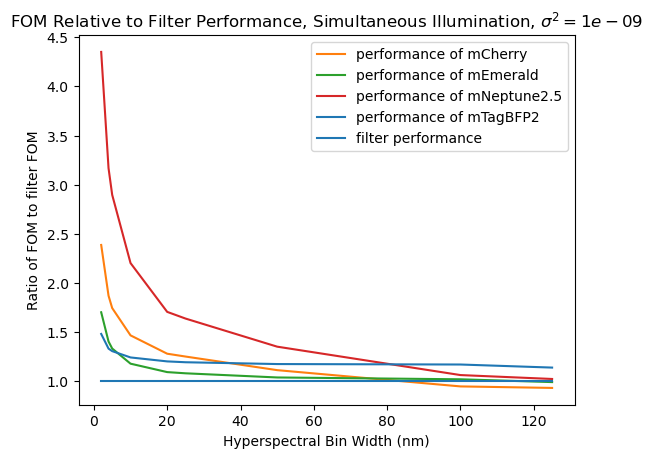

In [12]:
color = ['tab:orange', 'tab:green', 'tab:red', 'tab:blue']
for j in range(len(fluorophore_list)):
    fluorophore = fluorophore_list[j]
    results = scaled_results[:,j]
    plt.plot(divisors_of_five_hundred, results, label="performance of {}".format(fluorophore.name), color=color[j])

plt.plot(divisors_of_five_hundred, np.ones_like(np.array(divisors_of_five_hundred)), label="filter performance")

plt.title("FOM Relative to Filter Performance, Simultaneous Illumination, $\\sigma^2 = {}$".format(variance))
plt.xlabel("Hyperspectral Bin Width (nm)")
plt.ylabel("Ratio of FOM to filter FOM")
plt.legend()
#plt.savefig("Figures/FOM Relative to Filter Performance, updated filters, Simultaneous Illumination, variance = {}.png".format(variance), format="png")
plt.show()

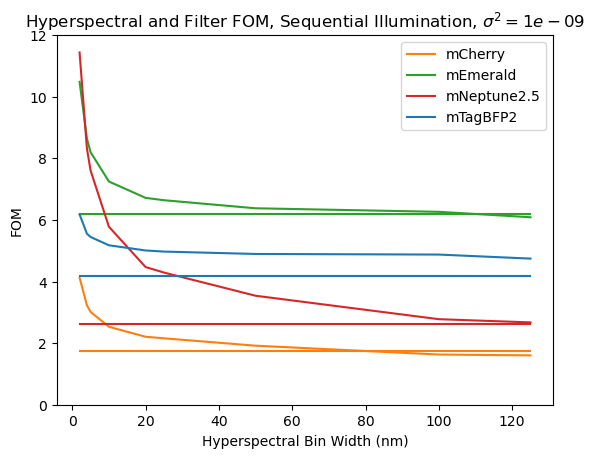

In [13]:
color = ['tab:orange', 'tab:green', 'tab:red', 'tab:blue']

for j in range(len(fluorophore_list)):
    fluorophore = fluorophore_list[j]
    results = results_array[:,j]
    plt.plot(divisors_of_five_hundred, results, label="{}".format(fluorophore.name), color=color[j])
    plt.plot(divisors_of_five_hundred, FOM_filter[j]*np.ones_like(np.array(divisors_of_five_hundred)), color=color[j])

#plt.plot(divisors_of_five_hundred, np.ones_like(np.array(divisors_of_five_hundred)), label="filter performance")

plt.title("Hyperspectral and Filter FOM, Sequential Illumination, $\\sigma^2 = {}$".format(variance))
plt.xlabel("Hyperspectral Bin Width (nm)")
plt.ylabel("FOM")
plt.legend()
#plt.ylim((0,12))
#plt.savefig("Figures/FOM, updated filters3, Sequential Illumination, variance = {}.png".format(variance), format="png")
plt.show()

### Caveats:
- k chosen arbitrarily
- x chosen arbitrarily

In [14]:
FOM_filter

array([1.73104138, 6.17756474, 2.62772259, 4.18649637])